# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [2]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [1]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray,rgba2rgb
from skimage.util import img_as_ubyte


def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

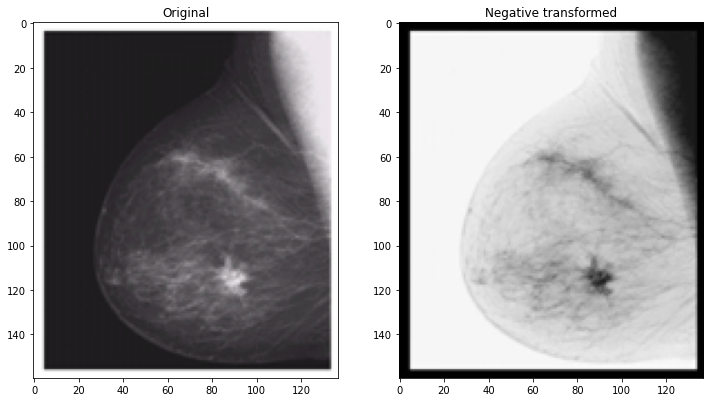

In [4]:
'''
1
Negative Transformation
'''
#T(r) = L - 1 - r


def negTransformation(img,threshold):
    negTransformedImg=threshold-1-rgb2gray(rgba2rgb(img))
    show_images([img,negTransformedImg],["Original","Negative transformed"])
    
img=io.imread('imgs/Picture1.png')
negTransformation(img,256)



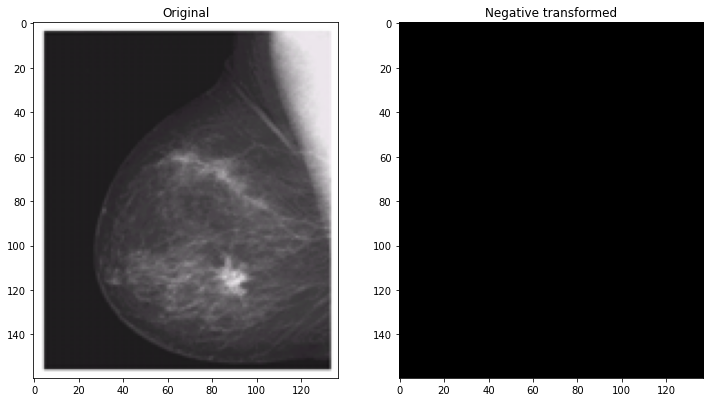

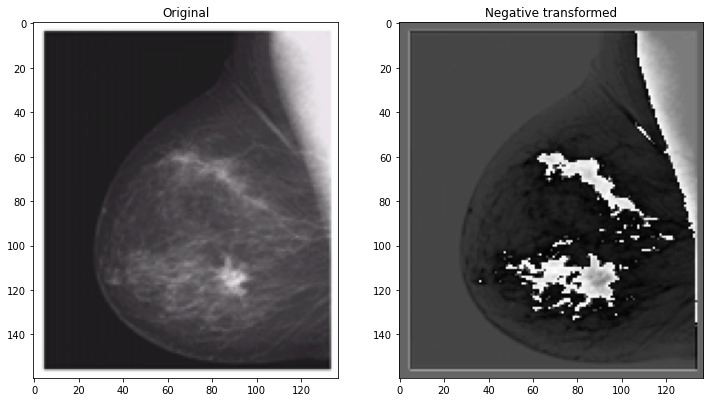

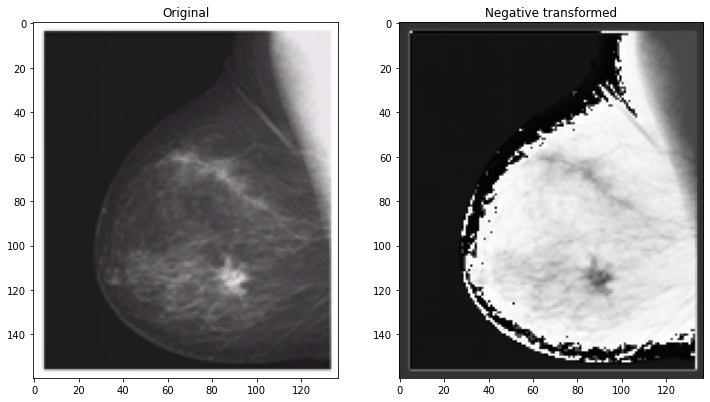

In [5]:
def negTransformation(img,threshold):
    negTransformedImg=threshold-1-img
    show_images([img,rgb2gray(rgba2rgb(negTransformedImg))],["Original","Negative transformed"])
    
img=io.imread('imgs/Picture1.png')
negTransformation(img,256)
negTransformation(img,100)
negTransformation(img,50)

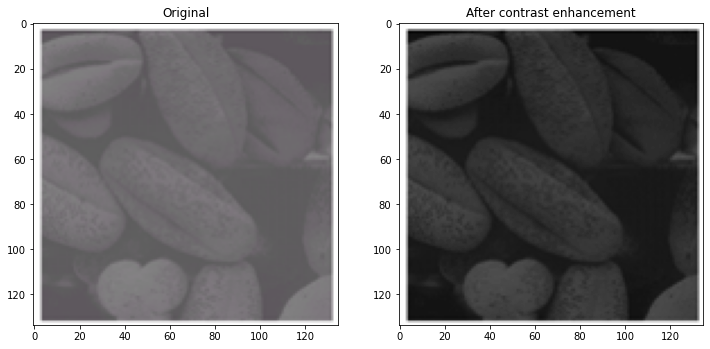

In [4]:
'''
2
Contrast Enhancement
'''
# source for matrix conditional indexing https://numpy.org/doc/stable/reference/generated/numpy.where.html

def Contrast_enhancement(img):
    gray_img=rgb2gray(rgba2rgb(img))
    np.where( (gray_img>=0)&(gray_img<=100), 1.5*gray_img+50, gray_img)
    return gray_img
    
    
    
img=io.imread("imgs/Picture2.png")
show_images([img,Contrast_enhancement(img)],["Original","After contrast enhancement"])



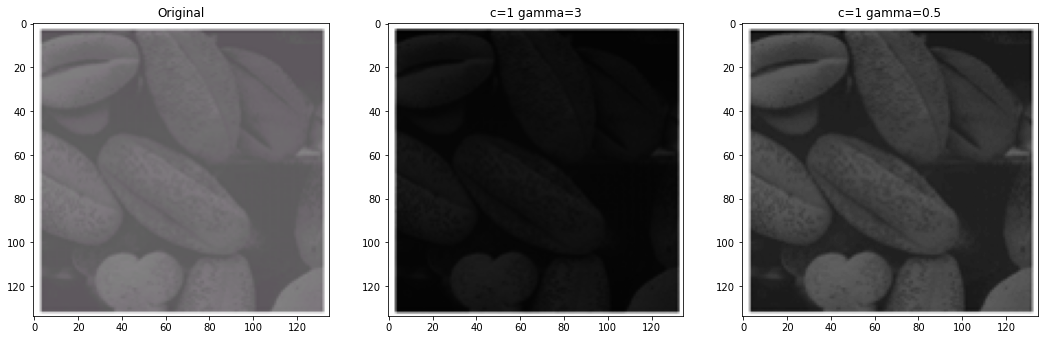

Higher gamma => darker image
Lower gamma  => Lighter image


In [5]:
'''
3
Gamma Correction
'''

def Gamma_Correction(img,c,gamma):
    gray_img=rgb2gray(rgba2rgb(img))
    gray_img=c*(gray_img**gamma)
    return gray_img

img=io.imread("imgs/Picture2.png")
show_images([img,Gamma_Correction(img,1,3),Gamma_Correction(img,1,0.5)],['Original','c=1 gamma=3','c=1 gamma=0.5'])



print("Higher gamma => darker image")
print("Lower gamma  => Lighter image")



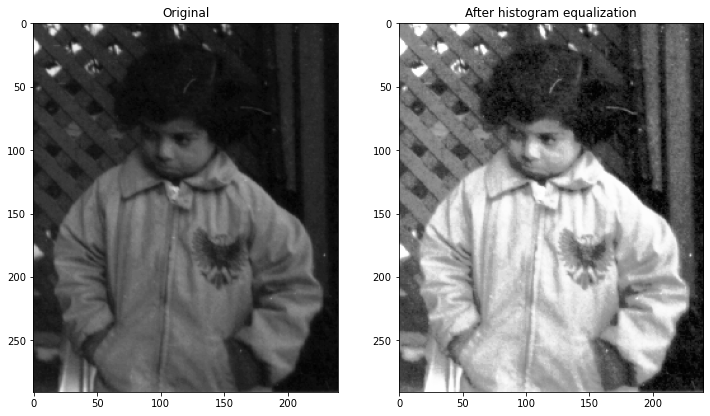

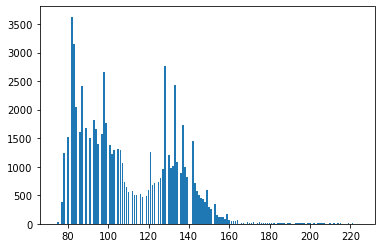

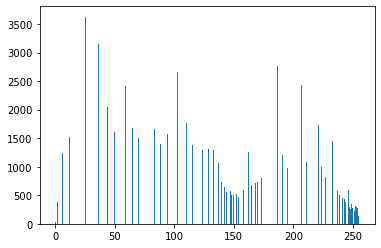

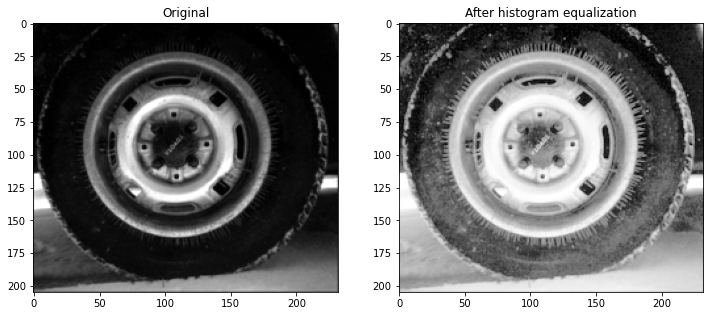

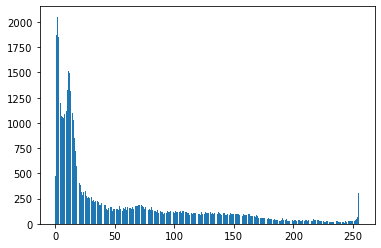

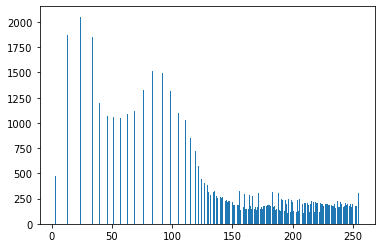

In [9]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''

    

def getImageWithHist(name,ext,nbins=256):
    pass

def histEqualization(image,G):
    #gray_img=rgb2gray(np.copy(img))
    img=np.copy(image)
    H=np.zeros(G)
    M=img.shape[0]
    N=img.shape[1]
    
#     for i in range(M):
#         for j in range(N):
#             H[img[i][j]]+=1

    histImg=histogram(img)
    f=histImg[0]
    bins=histImg[1]

    for i in range (f.shape[0]):
        H[bins[i]]=f[i]
            
    for i in range(1,len(H)):
        H[i]+=H[i-1]
        
    for i in range(M):
        for j in range(N):
            img[i][j]=round((G-1) * H[img[i][j]] /(N * M))
            
    return img


pout=io.imread('imgs/pout.tif')
tire=io.imread('imgs/tire.tif')


show_images([pout,histEqualization(pout,256)], ['Original', 'After histogram equalization'])
showHist(pout)
showHist(histEqualization(pout,256))

show_images([tire,histEqualization(tire,256)], ['Original', 'After histogram equalization'])
showHist(tire)
showHist(histEqualization(tire,256))
 
    
